In [376]:
# importing all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoCV, Ridge,RidgeCV, ElasticNet,ElasticNetCV,Lasso
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [377]:
# Load the dataset
df = pd.read_csv("/Users/malhardhopate/Desktop/IUB/Fall 2023/Applied Machine Learning/wine+quality/winequality-red.csv",sep=";",encoding="UTF-8")

#showing first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<H1>A] Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? </H1>

In [378]:
# summarize data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [379]:
print(df.describe())
print("*"*100)
print(df.shape)
print("*"*100)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

 <H3>Ans - A</H3>
 <H3>
    - There are a total of 1599 rows & 12 attributes  present none of the rows contains "N/A" or "NULL" values <br>
    - There are no Categorical Attributes <br>
    - Except 'quality' attribute, all other attributes are float type attributes, and 'quality' is an int type attribute </H3>

<H1>B] Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?</H1>

In [380]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

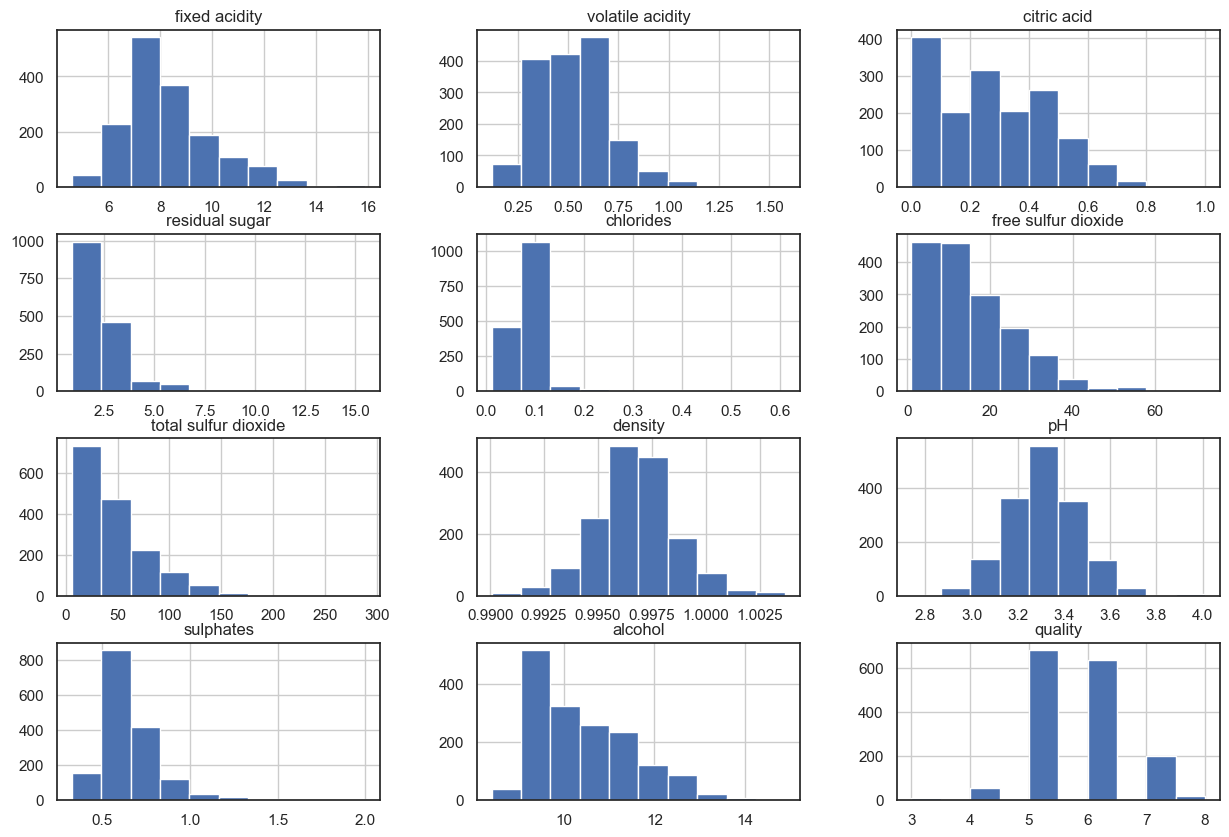

In [381]:
# plotting histogram
%matplotlib inline

df.hist(figsize=(15,10))

In [229]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [230]:
# Removing the year column from dataframe
df.drop(columns='year',inplace=True)

#Replacing the NAs with Median Values
df['Log GDP per capita'].fillna(df['Log GDP per capita'].median(),inplace=True)
df['Social support'].fillna(df['Social support'].median(),inplace=True)
df['Healthy life expectancy at birth'].fillna(df['Healthy life expectancy at birth'].median(),inplace=True)
df['Freedom to make life choices'].fillna(df['Freedom to make life choices'].median(),inplace=True)
df['Generosity'].fillna(df['Generosity'].median(),inplace=True)
df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].median(),inplace=True)
df['Positive affect'].fillna(df['Positive affect'].median(),inplace=True)
df['Negative affect'].fillna(df['Negative affect'].median(),inplace=True)

df.info()
print("*"*100)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   Life Ladder                       1949 non-null   float64
 2   Log GDP per capita                1949 non-null   float64
 3   Social support                    1949 non-null   float64
 4   Healthy life expectancy at birth  1949 non-null   float64
 5   Freedom to make life choices      1949 non-null   float64
 6   Generosity                        1949 non-null   float64
 7   Perceptions of corruption         1949 non-null   float64
 8   Positive affect                   1949 non-null   float64
 9   Negative affect                   1949 non-null   float64
dtypes: float64(9), object(1)
memory usage: 152.4+ KB
***********************************************************************************

Country name                        0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

<H1>Ans - B</H1>
<H3>
- We have dropped the year column from dataframe<br>
- All the attributes with N/A values are special and beeing treated to fill the N/A values, with the median value to avoid the outliers effect<br>
- The N/A's present in the dataset have been cleaned up.</H3>

<H1>C] Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.</H1>

In [231]:
#Dropping the Country Name Attribute to remove Categorical Values
df = df.drop(columns=['Country name'])
df.corr(method="pearson")

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.783257,0.705978,0.741064,0.525681,0.184202,-0.415288,0.530343,-0.296623
Log GDP per capita,0.783257,1.000000,0.682784,0.835302,0.360628,-0.003829,-0.326454,0.296822,-0.204294
Social support,0.705978,0.682784,1.000000,0.614223,0.409026,0.064236,-0.212068,0.430470,-0.395725
Healthy life expectancy at birth,0.741064,0.835302,0.614223,1.000000,0.381355,0.021098,-0.308823,0.313161,-0.139256
Freedom to make life choices,0.525681,0.360628,0.409026,0.381355,1.000000,0.318427,-0.469266,0.603294,-0.265139
Generosity,0.184202,-0.003829,0.064236,0.021098,0.318427,1.000000,-0.277798,0.348891,-0.089167
Perceptions of corruption,-0.415288,-0.326454,-0.212068,-0.308823,-0.469266,-0.277798,1.000000,-0.288331,0.255564
Positive affect,0.530343,0.296822,0.430470,0.313161,0.603294,0.348891,-0.288331,1.000000,-0.372698
Negative affect,-0.296623,-0.204294,-0.395725,-0.139256,-0.265139,-0.089167,0.255564,-0.372698,1.000000


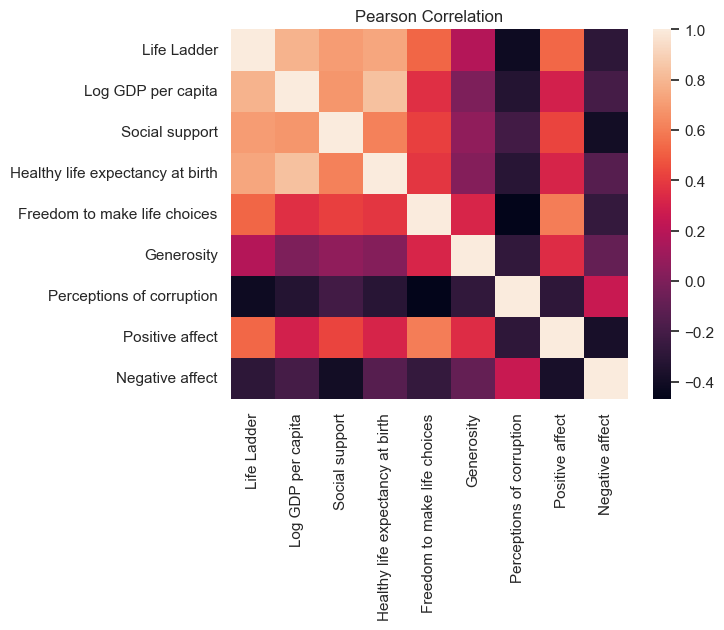

In [232]:
import seaborn as sns

#Making a Heatmap to determine Correlation
sns.set_theme(style="white")
ax = sns.heatmap(df.corr()).set_title("Pearson Correlation")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


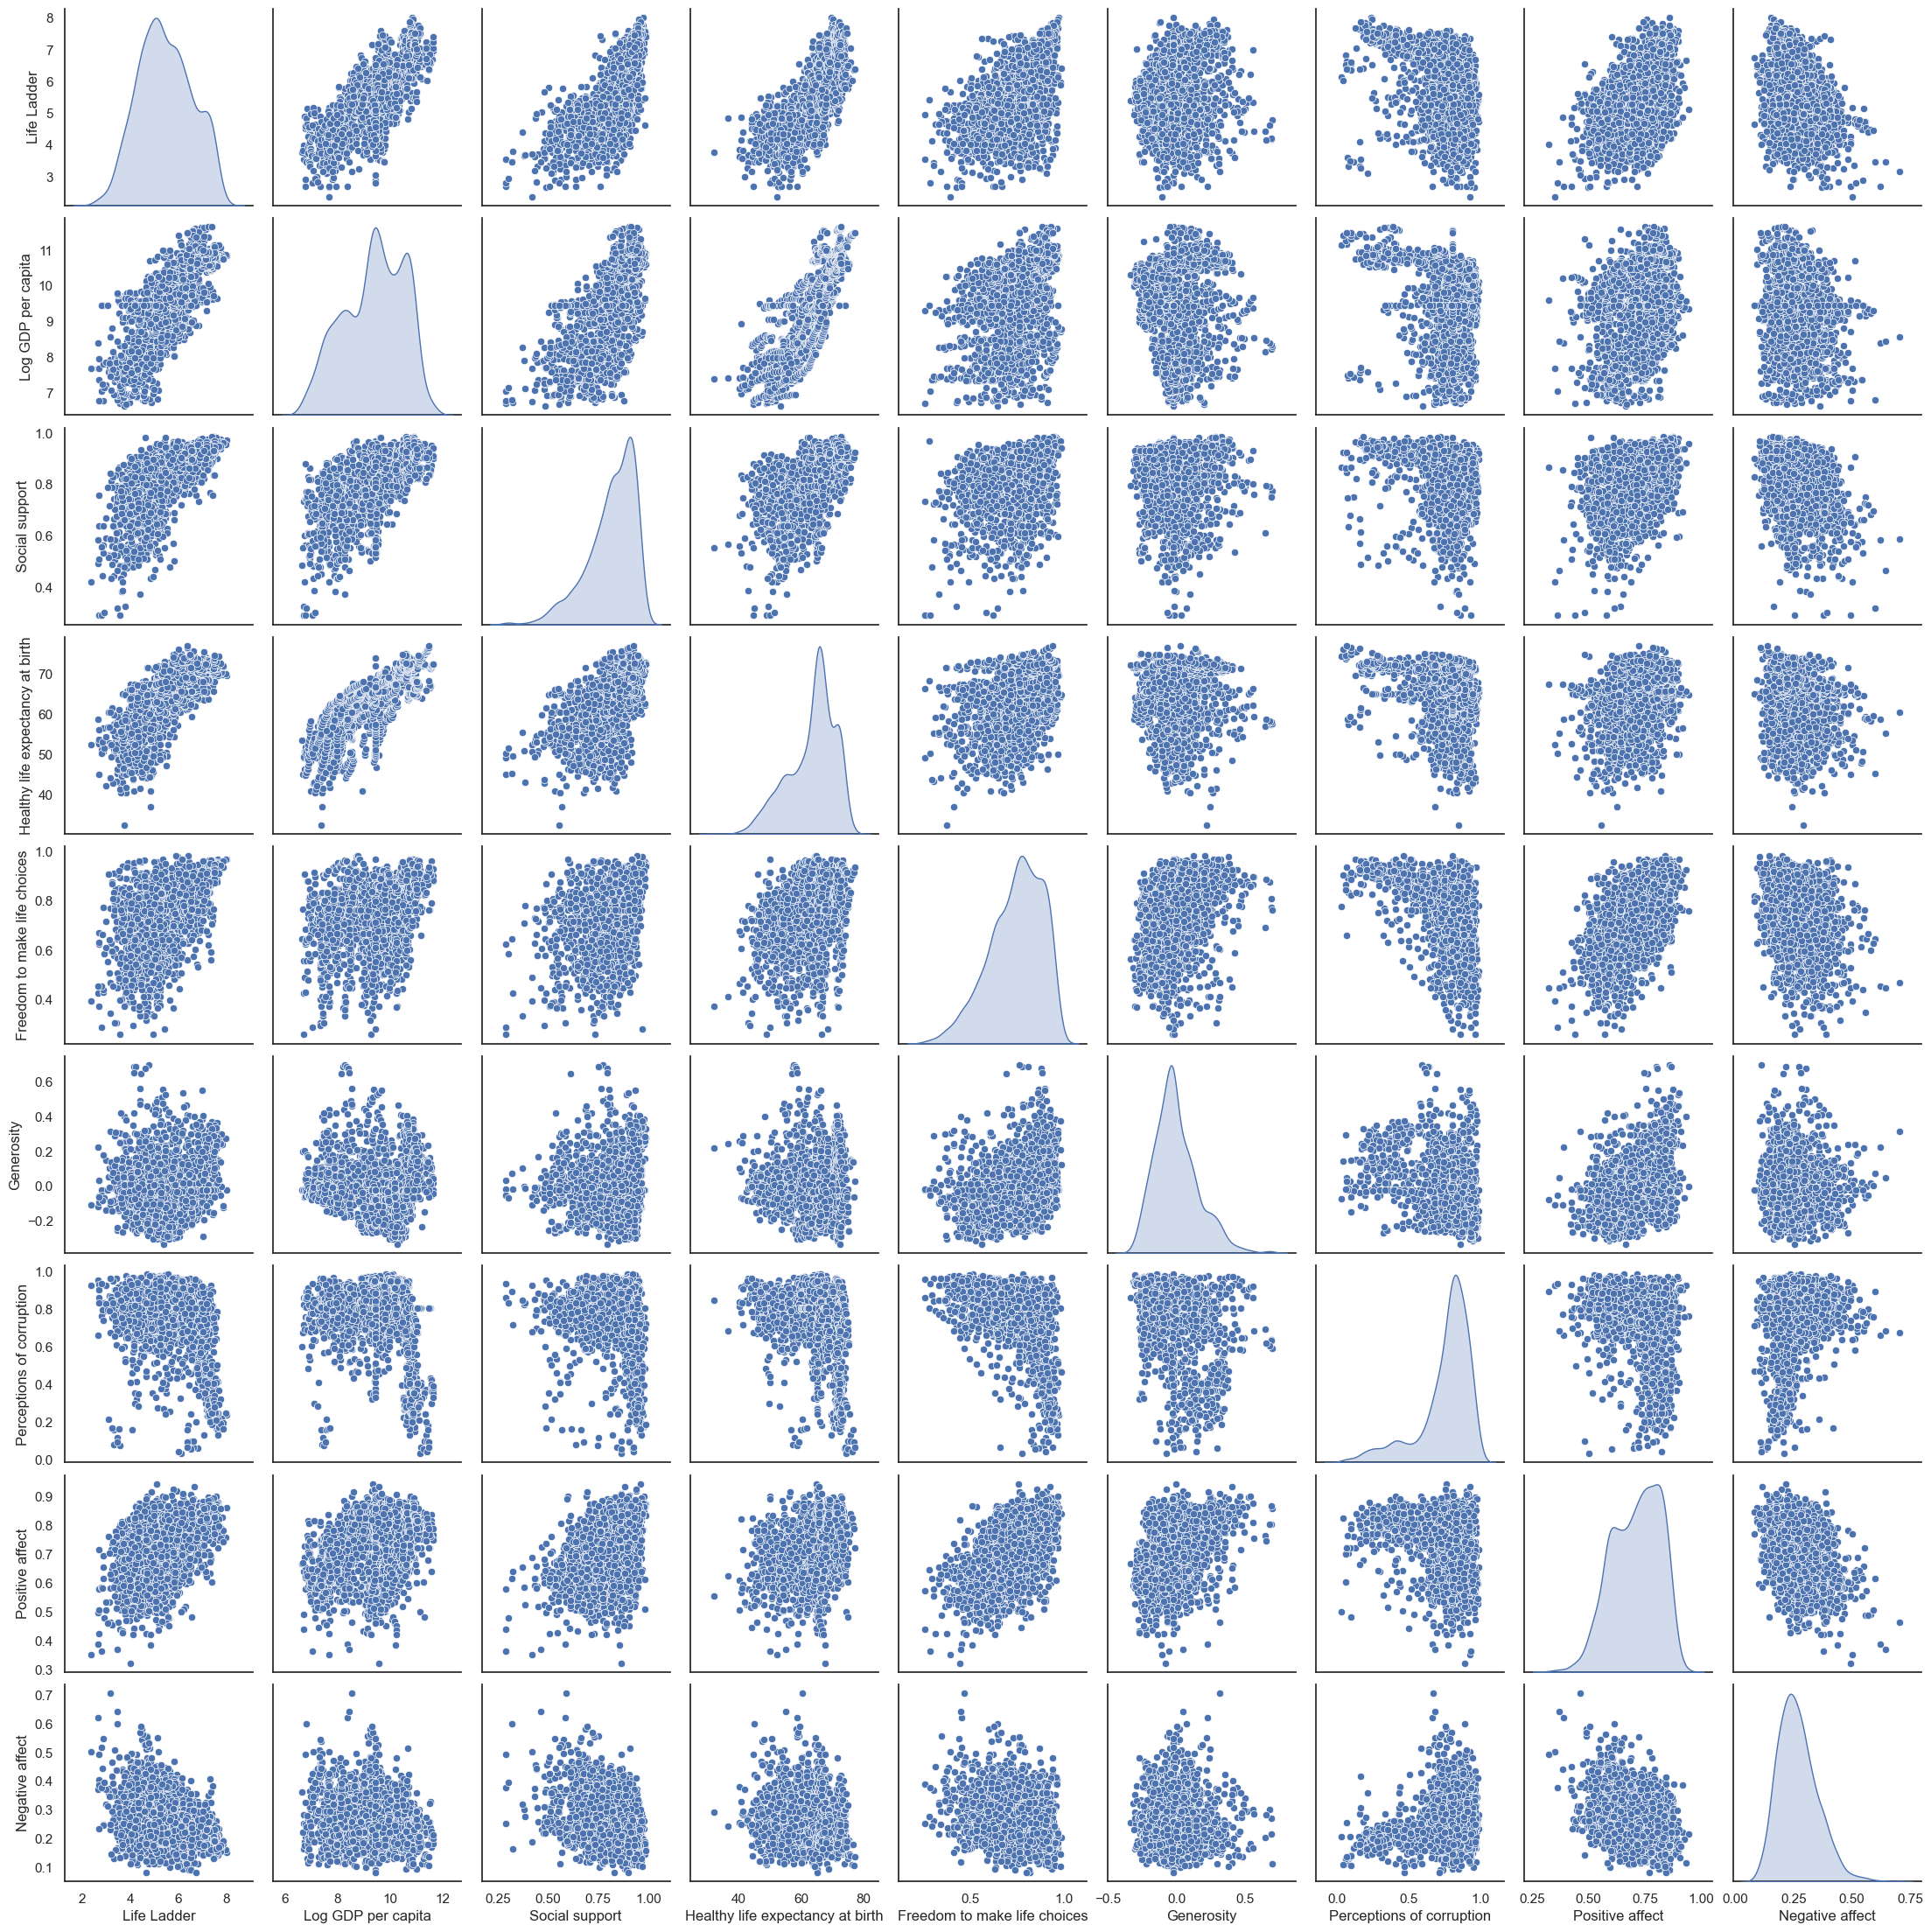

In [233]:
#Plotting Scatter Plots
sns.pairplot(df, diag_kind="kde")

<H1> Ans - C</H1>
<H3>From the plotted scatter plot we can see that Life Ladder has high co-relation with [Log GDP per capita], [Social support], [Healthy life expectancy at birth] 
and all these logically make sense as these are the important factors that contribute to prosperity of nation and thus happiness.</H3>

<H1>D] Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.</H1>

In [234]:
df.corr(method="pearson")['Life Ladder']

Life Ladder                         1.000000
Log GDP per capita                  0.783257
Social support                      0.705978
Healthy life expectancy at birth    0.741064
Freedom to make life choices        0.525681
Generosity                          0.184202
Perceptions of corruption          -0.415288
Positive affect                     0.530343
Negative affect                    -0.296623
Name: Life Ladder, dtype: float64

In [235]:
#X = df.drop(columns=['Life Ladder'])
#Y = df['Life Ladder']
#Selecting only the columns that have correlation > 0.5
X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity', 'Perceptions of corruption'])
Y = df['Life Ladder']
# Dividing data into train and test (20% data for test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

X.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect
0,7.370,0.451,50.80,0.718,0.518
1,7.540,0.552,51.20,0.679,0.584
2,7.647,0.539,51.60,0.600,0.618
3,7.620,0.521,51.92,0.496,0.611
4,7.705,0.521,52.24,0.531,0.710


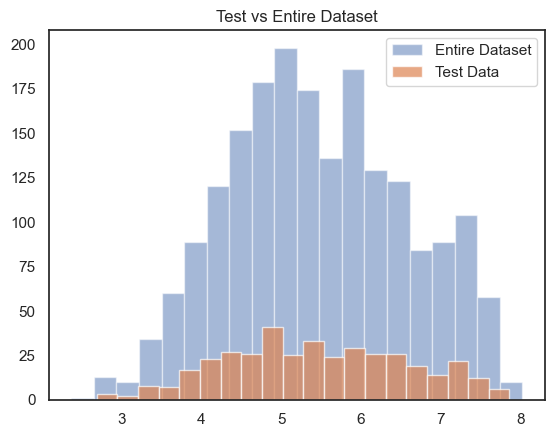

<Figure size 640x480 with 0 Axes>

In [312]:
#Testing if the testing data represents the entire dataset

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Visualize the distribution of Y - the key feature in the entire dataset
plt.hist(Y, bins=20, alpha=0.5, label='Entire Dataset')

# Visualize the distribution of the same feature ('Life Ladder') in the test set
plt.hist(y_test, bins=20, alpha = 0.7, label='Test Data')
plt.title('Test vs Entire Dataset')
plt.legend()
figure(figsize=(8, 6), dpi=80)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

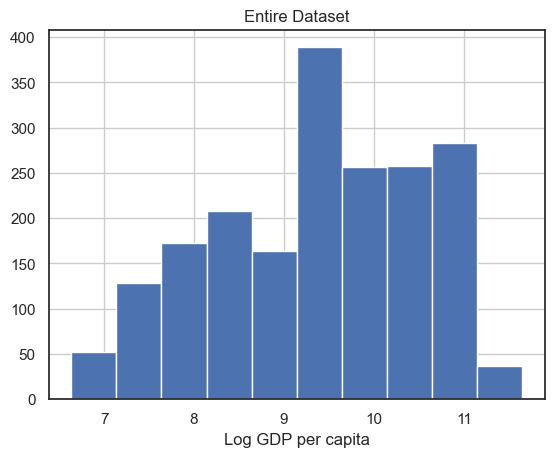

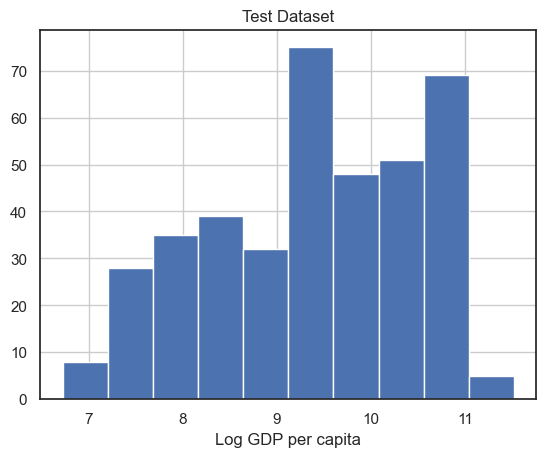

In [311]:
X.hist(column='Log GDP per capita')
plt.title("Entire Dataset")
plt.xlabel('Log GDP per capita')
plt.show

x_test.hist(column='Log GDP per capita')
plt.title("Test Dataset")
plt.xlabel('Log GDP per capita')
plt.show

<H1>Ans - D</H1>
<H3>Through the graph tittled 'Test vs Entire Dataset' we can see that the Test Data is reporesentative of the entire Dataset, as everybin in the Test Data corresponds to a bin in the entire dataset. We have also tested it with a single attribute 'Log GDP per capita' and it can be seen from the above graphs tittled Entire Dataset & Test Dataset that the Test Dataset is representative of the entire dataset. </H3>

<H1>E] Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.</H1>

In [385]:
#K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score

# create model
model = LinearRegression()
mymodel = model.fit(x_train,y_train)

#4-fold cv 
#evaluation metric is r2
scores = cross_val_score(mymodel, x_train, y_train, scoring='r2', cv=4)
scores
print('R2: %.3f' % np.mean(scores))
#evaluation metric - negative mean squared error
scores1 = -cross_val_score(mymodel, x_train, y_train, scoring='neg_mean_squared_error', cv=4)
scores1
print('MSE: %.3f' % np.mean(scores1))

R2: 0.749
MSE: 0.316


<H1>Linear Regression:</H1>
<H3>
• Linear regression provided a baseline model for regression tasks.<br>
• The model achieved an MSE of 0.33 and an R-squared (R2) score of 0.74 on the training data.</H3>

In [315]:
# Performing Closed Form solution using normal equation

x_closedForm = np.array(X)
y_closedForm = np.array(Y)
x_p = np.c_[np.ones((len(x_closedForm),1)),x_closedForm]

theta = np.linalg.inv(x_p.T.dot(x_p)).dot(x_p.T).dot(y_closedForm)
theta
x_test_1 = np.array([1,9.167,0.880,59.90,0.834,0.859])
#x_test_1 = np.array(x_test.head(1))
#x_test_p = np.c_[np.ones((len(x_test_1),1)),x_test_1]
print(theta)
y_predict = x_test_1.dot(theta)
y_predict


[-3.57969841  0.39129312  1.73077882  0.02811142  0.86669643  2.17826952]


5.808203332535946

In [352]:
# Regresion using SGD
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

#X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity', 'Perceptions of corruption'])
X = df.drop(columns=['Life Ladder'])
Y = df['Life Ladder']
# Dividing data into train and test (20% data for test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

al = [0.1,0.001,0.0001,1,10]
for i in al:
    sgd = SGDRegressor(loss='squared_error',alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42, eta0 = i)
    sgd.fit(X_train, y_train)
    #sgd = SGDRegressor(alpha=best_params['alpha'], penalty=best_params['penalty'], max_iter=best_params['max_iter'], batch_size=32)
    sgd.fit(x_train, y_train)
    y_pred = sgd.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse =np.sqrt(mse)
    print(f"Root Mean Squared Error for alpha = {i}: {rmse}")
    print(f"Mean Squared Error for alpha = {i}: {mse}")
    print("*"*100)

Root Mean Squared Error for alpha = 0.1: 846256254804.6376
Mean Squared Error for alpha = 0.1: 7.161496487959716e+23
****************************************************************************************************
Root Mean Squared Error for alpha = 0.001: 0.664224332002299
Mean Squared Error for alpha = 0.001: 0.4411939632239003
****************************************************************************************************
Root Mean Squared Error for alpha = 0.0001: 0.7264109986853663
Mean Squared Error for alpha = 0.0001: 0.5276729390110713
****************************************************************************************************
Root Mean Squared Error for alpha = 1: 137952155574893.22
Mean Squared Error for alpha = 1: 1.9030797227759542e+28
****************************************************************************************************
Root Mean Squared Error for alpha = 10: 600900994797302.5
Mean Squared Error for alpha = 10: 3.6108200554838774e+29
*********

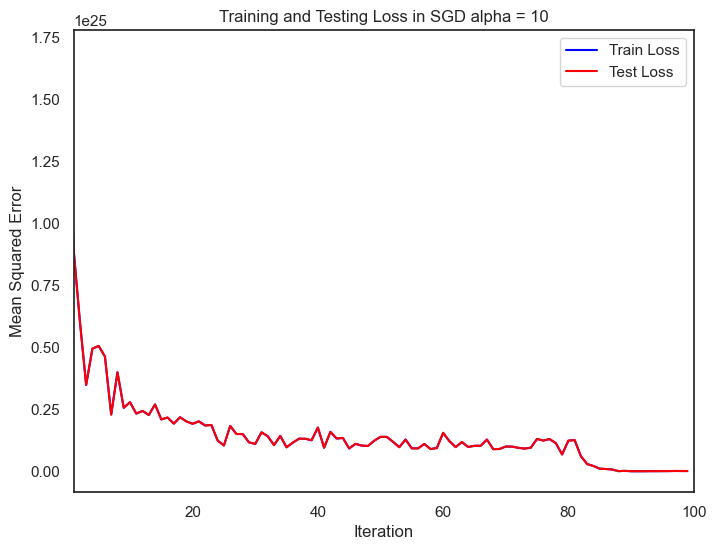

In [374]:
#Plotting the training and validation loss as a function of training iteration -
#Define the SGDRegressor model

sgd = SGDRegressor(alpha=10, max_iter=100, random_state=42)

# Initialize lists to record training and testing loss
train_losses = []
test_losses = []

# Training loop
for i in range(sgd.max_iter):
    # Fit the model with one iteration of SGD
    sgd.partial_fit(x_train, y_train)
    
    # Calculate training loss
    y_train_pred = sgd.predict(x_train)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_losses.append(train_loss)
    
    # Calculate testing loss
    y_test_pred = sgd.predict(x_test)
    test_loss = mean_squared_error(y_test, y_test_pred)
    test_losses.append(test_loss)

# Plot the training and testing loss over iterations
plt.figure(figsize=(8,6))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='red')
plt.xlim(1,100)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title(f'Training and Testing Loss in SGD alpha = {sgd.alpha}')
plt.show()

In [319]:
#Ridge Regression with multiple error values (alpha values), using Cross Validation - 
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
cv = [0.00001, 0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Ridge model for different penalty values
for i in cv:
    print(f"\nRidgeCV Model (alpha = {i})............................................\n")
    ridge_cv = RidgeCV(alphas = [i],cv = 4).fit(x_train, y_train)
    #score
    print("The train score for ridge model is {}".format(ridge_cv.score(x_train, y_train)))
    print("The train score for ridge model is {}".format(ridge_cv.score(x_test, y_test)))


RidgeCV Model (alpha = 1e-05)............................................

The train score for ridge model is 0.7491929995060745
The train score for ridge model is 0.748858220167256

RidgeCV Model (alpha = 0.0001)............................................

The train score for ridge model is 0.7491929995037712
The train score for ridge model is 0.7488581880141465

RidgeCV Model (alpha = 0.001)............................................

The train score for ridge model is 0.7491929992734586
The train score for ridge model is 0.7488578662855387

RidgeCV Model (alpha = 0.01)............................................

The train score for ridge model is 0.7491929762742003
The train score for ridge model is 0.7488546292822478

RidgeCV Model (alpha = 0.1)............................................

The train score for ridge model is 0.7491907079035964
The train score for ridge model is 0.7488203211758538

RidgeCV Model (alpha = 1)............................................

The train s

<H1>Ridge Regression:</H1>
<H3>
- Ridge regression was applied with varying alpha values (penalty terms).<br>
- Higher alpha values (e.g., alpha=10) increased regularization, resulting in a slightly lower test R2 score.<br>
- Ridge regression is effective for preventing overfitting by penalizing large coefficients.</H3>

In [322]:
#Lasso Regression with multiple error values (alpha values), using Cross Validation - 
#Using Lasso Cross validation

cv = [0.00001, 0.0001, 0.001,0.01, 0.1, 1, 10]
#Fitting Lasso model for different penalty values
for i in cv:
    lasso_cv = LassoCV(alphas = [i], random_state=0, cv = 4).fit(x_train, y_train)
    print(f"\nLassoCV Model (alpha = {i})............................................\n")
    #score
    print("The train score for LassoCV model is: ",lasso_cv.score(x_train, y_train))
    print("The test score for LassoCV model is: ", lasso_cv.score(x_test, y_test))


LassoCV Model (alpha = 1e-05)............................................

The train score for LassoCV model is:  0.7491929872909886
The test score for LassoCV model is:  0.748855747542663

LassoCV Model (alpha = 0.0001)............................................

The train score for LassoCV model is:  0.7491916635474642
The test score for LassoCV model is:  0.748796475762264

LassoCV Model (alpha = 0.001)............................................

The train score for LassoCV model is:  0.7490569472211749
The test score for LassoCV model is:  0.7480645474655447

LassoCV Model (alpha = 0.01)............................................

The train score for LassoCV model is:  0.7355440217118207
The test score for LassoCV model is:  0.7291933878166119

LassoCV Model (alpha = 0.1)............................................

The train score for LassoCV model is:  0.6202701398433207
The test score for LassoCV model is:  0.6063668869755834

LassoCV Model (alpha = 1).......................

<H1>Lasso Regression:</H1>
<H3>
- Lasso regression was used with different alpha values.<br>
- Higher alpha values (e.g., alpha=10) led to stronger regularization, reducing both training and test scores significantly.<br>
- Lasso regression not only mitigates overfitting but also performs feature selection by driving some coefficients to zero.</H3>

In [347]:
#Elastic Net Regression with multiple error values (alpha values), using Cross Validation - 
#Using Elastic Net Cross Validation

#Lasso Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Elastic Net model for different penalty values
for i in cv:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(x_train, y_train) 
    train_score = model_enet.score(x_train,y_train)
    test_score = model_enet.score(x_test,y_test)
    #score
    print(f"\nElastic Net Model (alpha ={i})............................................\n")
    print("The train score for elastic net model is {}".format(train_score))
    print("The test score for elastic net model is {}".format(test_score))


Elastic Net Model (alpha =0.0001)............................................

The train score for elastic net model is 0.7545517378514136
The test score for elastic net model is 0.7841953885433925

Elastic Net Model (alpha =0.001)............................................

The train score for elastic net model is 0.7542733397394258
The test score for elastic net model is 0.7830334475057317

Elastic Net Model (alpha =0.01)............................................

The train score for elastic net model is 0.7406577963903482
The test score for elastic net model is 0.7630676204318256

Elastic Net Model (alpha =0.1)............................................

The train score for elastic net model is 0.6282413098742147
The test score for elastic net model is 0.6406136675527292

Elastic Net Model (alpha =1)............................................

The train score for elastic net model is 0.5436095983316771
The test score for elastic net model is 0.5514469914723722

Elastic Net Mod

<H1>Elastic Net Regression:</H1>
<H3>
- Elastic Net regression was employed with different alpha values.<br>
- Higher alpha values (e.g., alpha=10) resulted in lower test R2 scores, indicating stronger regularization.<br>
- Elastic Net combines L1 (Lasso) and L2 (Ridge) penalties, offering a balance between feature selection and coefficient shrinkage.</H3>

Mean Squared Error: 0.2331637513037584
Root mean Squared value is: 0.4828703255572436
R2 Score: 0.8005120576737166


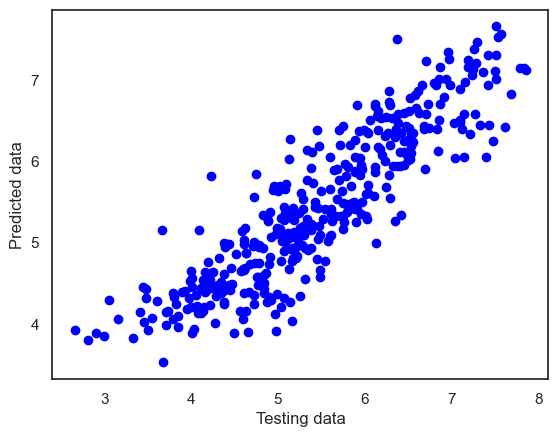

In [329]:
#Polynomial Regression
import math
df.head()

X = df.drop(columns=['Life Ladder', 'Negative affect', 'Generosity','Perceptions of corruption'])
Y = df['Life Ladder'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 100)

# # Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.head()

# # Create polynomial features

poly = PolynomialFeatures(degree = 2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)


# # Initialize and train a linear regression model

model = LinearRegression()
model.fit(X_train_poly, y_train)

# # Make predictions on the test data

y_pred = model.predict(X_test_poly)

# # Calculate and print the Mean Squared Error (MSE)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared value is: {math.sqrt(mse)}")

# from sklearn.metrics import r2_score
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print(f"R2 Score: {r2}")

# Plotting the original data and the polynomial regression curve
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('Testing data')
plt.ylabel('Predicted data')
plt.show()


In [348]:
#Ridge regression for Polynomial using cross validation
#Using the linear CV model

from sklearn.linear_model import RidgeCV

#Lasso Cross validation

cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Ridge model for different penalty values
for i in cv:
    print(f"\nRidgeCV Model (alpha = {i})............................................\n")
    ridge_cv = RidgeCV(alphas = [i], cv = 4).fit(X_train_poly, y_train)
    #score
    print("The train score for ridge model is {}".format(ridge_cv.score(X_train_poly, y_train)))
    print("The train score for ridge model is {}".format(ridge_cv.score(X_test_poly, y_test)))


RidgeCV Model (alpha = 0.0001)............................................

The train score for ridge model is 0.7847805454617091
The train score for ridge model is 0.8005120571047383

RidgeCV Model (alpha = 0.001)............................................

The train score for ridge model is 0.784780545461075
The train score for ridge model is 0.800512051983344

RidgeCV Model (alpha = 0.01)............................................

The train score for ridge model is 0.7847805453976904
The train score for ridge model is 0.8005120007113931

RidgeCV Model (alpha = 0.1)............................................

The train score for ridge model is 0.7847805390738387
The train score for ridge model is 0.8005114822064101

RidgeCV Model (alpha = 1)............................................

The train score for ridge model is 0.7847799209626806
The train score for ridge model is 0.8005057335780749

RidgeCV Model (alpha = 10)............................................

The train score

In [349]:
#Lasso regression for Polynomial using cross validation
#Using the Lasso Cross Validation model

cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Lasso model for different penalty values
for i in cv:
    print(f"\nLassoCV Model (alpha = {i})............................................\n")
    lasso_cv = LassoCV(alphas = [i], random_state=0, cv = 4).fit(X_train_poly, y_train)
    #score
    print("The train score for lasso model is {}".format(lasso_cv.score(X_train_poly, y_train)))
    print("The train score for lasso model is {}".format(lasso_cv.score(X_test_poly, y_test)))


LassoCV Model (alpha = 0.0001)............................................

The train score for lasso model is 0.784779037139416
The train score for lasso model is 0.8005539350452036

LassoCV Model (alpha = 0.001)............................................

The train score for lasso model is 0.7846315283094178
The train score for lasso model is 0.8008099022455947

LassoCV Model (alpha = 0.01)............................................

The train score for lasso model is 0.78180845386457
The train score for lasso model is 0.8001122403243215

LassoCV Model (alpha = 0.1)............................................

The train score for lasso model is 0.7472577721777623
The train score for lasso model is 0.7723047638448926

LassoCV Model (alpha = 1)............................................

The train score for lasso model is 0.0
The train score for lasso model is -7.38408864535689e-05

LassoCV Model (alpha = 10)............................................

The train score for lasso mo

In [350]:
#Elastic Net regression for Polynomial using cross validation
from sklearn.linear_model import ElasticNet

#Elastic Net Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Elactic Net with different penalty values
for i in cv:
    print(f"\nElasticCV Model (alpha = {i})............................................\n")
    elastic_cv = ElasticNet(alpha = i).fit(X_train_poly, y_train)
    #score
    print("The train score for lasso model is {}".format(elastic_cv.score(X_train_poly, y_train)))
    print("The train score for lasso model is {}".format(elastic_cv.score(X_test_poly, y_test)))


ElasticCV Model (alpha = 0.0001)............................................

The train score for lasso model is 0.7847800973829684
The train score for lasso model is 0.8005326717436128

ElasticCV Model (alpha = 0.001)............................................

The train score for lasso model is 0.7847368672352645
The train score for lasso model is 0.8006850393754847

ElasticCV Model (alpha = 0.01)............................................

The train score for lasso model is 0.7829108768986043
The train score for lasso model is 0.8004335955467963

ElasticCV Model (alpha = 0.1)............................................

The train score for lasso model is 0.7702483574373493
The train score for lasso model is 0.790659665477849

ElasticCV Model (alpha = 1)............................................

The train score for lasso model is 0.37595380419993885
The train score for lasso model is 0.38495388099395644

ElasticCV Model (alpha = 10)............................................

